# Convexity

A convex function is a continuous function whose value at the midpoint of every interval in its domain does not exceed the arithmetic mean of its values at the ends of the interval. The mathematical definition is as follow *(see reference: http://mathworld.wolfram.com/ConvexFunction.html)*:

A function $f(x)$ is convex on an interval $[a, b]$ if for any two points $x_1$ and $x_2$ in $[a,b]$ and any $\lambda$ where $0 < \lambda < 1$,

 $$f[ \lambda x_1 + (1 - \lambda) x_2] \leq \lambda f(x_1) + (1 - \lambda) f(x_2)$$ 
 
From a game theorist perspective this mean that a combined player for a given set of opponents $X$ and $Y$ has a lower utility than the combined payoffs of $X$ and $Y$.

In this notebook we check if the utility function is indeed convex.

Though there is a lot of work in ratio of quadratic forms $\frac{f(1)}{f(2)}$, it's mainly done for the case where both $f(1)$ and $f(2)$ are convex, in 1, 2 they argue that the quotient of convex functions is not convex in most cases.

In order for a quadratic form to be convex the $Q$ matrix must be proven to be positive semi definite. Here is the proof:

If $f(x)=x^{T}Qx$:

$$
(\lambda x_{1} + (1 − \lambda)x_{2})^{T}Q(\lambda x_{1} + (1 − \lambda)x_{2}) \leq \lambda{x_{1}}^{T}Qx_{1} + (1 − \lambda){x_{2}}^{T}Qx_{2}
$$

by simplifing the inequality *(I did it by hand)* we show that:

$$
{(x_{1} − x_{2})}^{T} Q (x_{1} − x_{2}) \geq 0
$$

which is true for $Q \geq 0$, thus when $Q$ is positive semi definite.

Our utility function is the ratio of two quadratic forms. Here we will prove that neither are convex. When a matrix $Q$ is semi positive definite, every leading principal sub matrix of $Q$ is semi positive definite too. *https://math.stackexchange.com/questions/811387/characterization-of-positive-definite-matrix-with-principal-minors*

Thus we will calculate the determinants of the sub matrices for both the numerator and denominator to prove that our functions are not convex. 

In [1]:
import sympy as sym

sym.init_printing()


In [3]:
import opt_mo


In [4]:
import numpy as np
import axelrod as axl


In [16]:
p_1, p_2, p_3, p_4 = sym.symbols("p_1, p_2, p_3, p_4", positive=True, real=True)


In [17]:
p = (p_1, p_2, p_3, p_4)


In [18]:
utility = opt_mo.match_utility(p, (1 / 3, 1 / 3, 1 / 3, 1 / 3))


In [19]:
u = sym.lambdify(p, utility)


In [35]:
def rhs(x_1, x_2, l=0.1):
    return l * u(*x_1) + (1 - l) * u(*x_2)


def lhs(x_1, x_2, l=0.1):
    vector = l * x_1 + (1 - l) * x_2
    return u(*vector)


In [36]:
x_1 = np.array([1 / 4, 1 / 2, 1 / 5, 1 / 2])


In [37]:
axl.seed(4)
x_2 = np.random.random(4)


In [38]:
x_2 = np.array([8 / 10, 1 / 2, 9 / 10, 7 / 10])


In [39]:
rhs(x_1, x_2), lhs(x_1, x_2)


In [40]:
for i in range(10):
    axl.seed(i)
    x_2 = np.random.random(4)
    print(rhs(x_1, x_2), lhs(x_1, x_2))


1.5305582438952945 1.5328098826099477
1.863703748576778 1.8590179608503679
1.845685721827129 1.8470879749171525
1.6075571401150133 1.6121655009539195
1.4162007433253723 1.4117647686254302
1.4828803167057147 1.4815697989651286
1.8167288752984028 1.8160844594690893
1.5827979158192478 1.5808632897036246
1.1863341329029913 1.2090994496967786
1.9458782013777471 1.944755545142358


In [111]:
x_1, x_2


(array([0.25, 0.5 , 0.2 , 0.5 ]),
 array([0.96702984, 0.54723225, 0.97268436, 0.71481599]))

In [4]:
q_1, q_2, q_3, q_4 = sym.symbols("q_1, q_2, q_3, q_4", positive=True, real=True)


In [7]:
q = (q_1, q_2, q_3, q_4)


For the numerator $Q$.

In [12]:
Q = sym.Matrix(opt_mo.mem_quadratic_numerator(q))


In [13]:
det_1 = Q[0]
det_1


In [14]:
det_2 = sym.Matrix([[Q[0], Q[1]], [Q[4], Q[5]]]).det()
det_2.factor()


In [15]:
det_3 = sym.Matrix([[Q[0], Q[1], Q[2]], [Q[4], Q[5], Q[6]], [Q[8], Q[9], Q[10]]]).det()
det_3.factor()


In [16]:
det = Q.det()


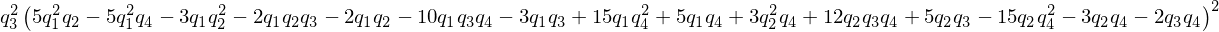

In [17]:
det.factor()


For the denominator  $ \bar{Q}$.

In [21]:
Q_den = sym.Matrix(opt_mo.mem_quadratic_denominator(q))


In [23]:
det_1 = Q_den[0]
det_1


In [24]:
det_2 = sym.Matrix([[Q_den[0], Q_den[1]], [Q_den[4], Q_den[5]]]).det()
det_2.factor()


In [25]:
det_3 = sym.Matrix(
    [
        [Q_den[0], Q_den[1], Q_den[2]],
        [Q_den[4], Q_den[5], Q_den[6]],
        [Q_den[8], Q_den[9], Q_den[10]],
    ]
).det()
det_3.factor()


In [26]:
det = Q_den.det()
det.factor()


Conclusion
----------

Because at least one of the determinats is negative neither the numerator or the denominator are proven to be convex.


There is only a single article on non convex ratio of non convex function but it does not seem to generilize anything for a non convex ratio, 3. A general rule for the ratio of two non convex functions and whether their ratio is convex can not be given. 

Ratio's of two non convex function that is convex exists. Example $\frac{x^5}{x^3}$

